# Machine Learning Nanodegree

## Capstone Project

## Stock Price Indicator Proposal
---

## Data Exploration and Preprocess
### Import Dataset
---

### Import the data from csv file

In [268]:
import pandas as pd
import numpy as np
from IPython.display import display

# Read csv file by pandas
TSMC_data = pd.read_csv("./data/2330.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
TWII_data = pd.read_csv("./data/TWII.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

# Preview data
print('TSMC data preview')
display(TSMC_data.head())
print('TWII data preview')
display(TWII_data.head())

TSMC data preview


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-02,33.166302,33.474602,32.703499,32.780399,19.280724,2.992526e+10
2003-01-03,33.937302,34.708401,33.629101,34.554600,20.324272,5.257968e+10
2003-01-06,34.554600,35.248798,34.245602,34.554600,20.324272,4.912915e+10
2003-01-07,35.248798,36.174301,35.017399,35.017399,20.596478,6.169851e+10


TWII data preview


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-02,4460.569824,4553.109863,4431.189941,4524.870117,4524.870117,3332000.0
2003-01-03,4618.240234,4641.459961,4602.240234,4626.319824,4626.319824,4723600.0
2003-01-06,4653.990234,4710.310059,4635.870117,4689.859863,4689.859863,4714400.0
2003-01-07,4759.810059,4776.149902,4695.439941,4701.080078,4701.080078,5686800.0


### Plot the data

First 50 rows history data


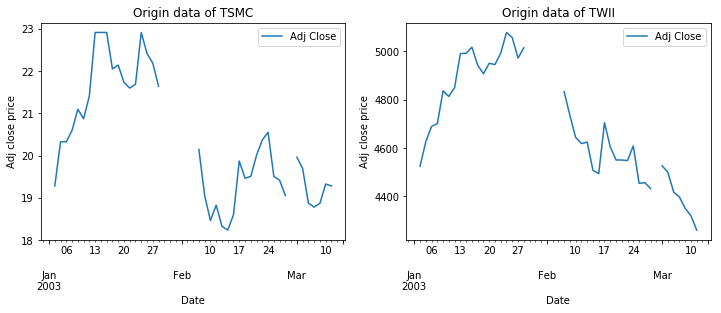

In [270]:
import matplotlib.pyplot as plt

# Use the first 50 rows of data
origin_50_TSMC = pd.DataFrame(TSMC_data['Adj Close'][0:50])
origin_50_TWII = pd.DataFrame(TWII_data['Adj Close'][0:50])
# Visualize the Adjusted Close data
print('First 50 rows history data')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
origin_50_TSMC.plot(ax=axes[0]);
axes[0].set_title('Origin data of TSMC')
axes[0].set_ylabel('Adj close price')

origin_50_TWII.plot(ax=axes[1]);
axes[1].set_title('Origin data of TWII')
axes[1].set_ylabel('Adj close price')

plt.show()

First 50 rows history data


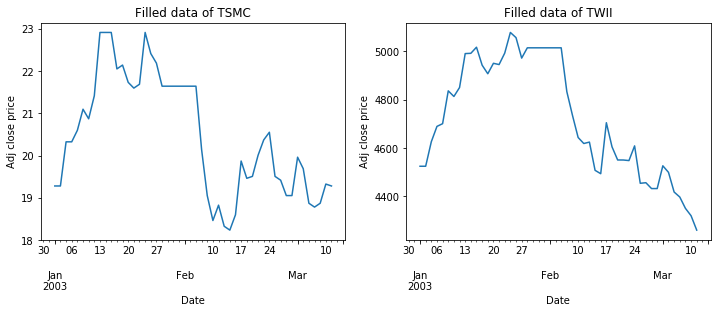

In [271]:
# Replace the null value with the value of previous day or the day after 
TSMC_data.fillna(method="ffill", inplace=True)
TSMC_data.fillna(method="bfill", inplace=True)

TWII_data.fillna(method="ffill", inplace=True)
TWII_data.fillna(method="bfill", inplace=True)


print('First 50 rows history data')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
TSMC_data['Adj Close'][0:50].plot(ax=axes[0]);
axes[0].set_title('Filled data of TSMC')
axes[0].set_ylabel('Adj close price')
TWII_data['Adj Close'][0:50].plot(ax=axes[1]);
axes[1].set_title('Filled data of TWII')
axes[1].set_ylabel('Adj close price')


plt.show()

### Compare the TSMC and TWII

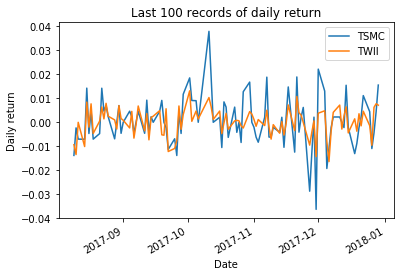

In [272]:
TSMC_adj_close = TSMC_data['Adj Close']
TWII_adj_close = TWII_data['Adj Close']

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return


TSMC_daily_return = compute_daily_returns(TSMC_adj_close)
TWII_daily_return = compute_daily_returns(TWII_adj_close)

df = pd.DataFrame({'TSMC':TSMC_daily_return, 'TWII':TWII_daily_return})

daily_ax = df[-100:].plot(title='Last 100 records of daily return')

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='upper right')
plt.show()

### Calculate Statistical Analysis

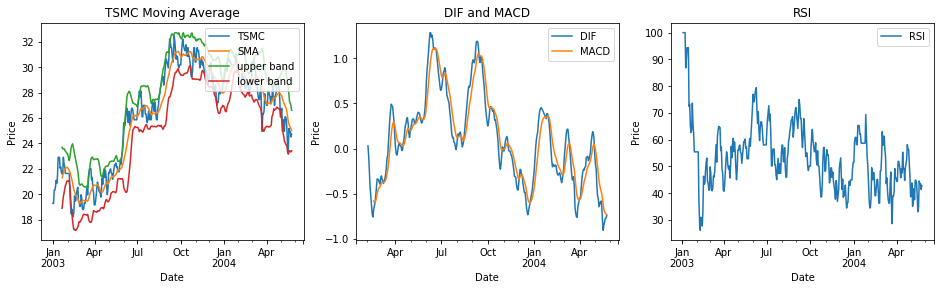

In [273]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Calculate Simple Moving Average for TSMC
SMA_TSMC = calculate_SMA(TSMC_adj_close)

TSMC_adj_close[:365].plot(title='TSMC Moving Average',label='TSMC', ax=axes[0])

SMA_TSMC[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for TSMC
upper_band, lower_band = calculate_BB(TSMC_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for TSMC
DIF, MACD = calculate_MACD(TSMC_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for TSMC
RSI = calculate_RSI(TSMC_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')

plt.show()

In [166]:
test = TSMC_data
test['SMA'] = SMA_TSMC
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI

# Drop null value because of indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

,Open,High,Low,Close,Adj Close,Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI
Date,,,,,,,,,,,,
2003-02-17,33.782799,33.782799,33.011799,33.782799,19.870312,7.718598e+10,20.200040,23.163993,17.236086,-0.677400,-0.580037,46.308288
2003-02-18,33.782799,33.782799,33.011799,33.088699,19.462057,4.262700e+10,20.054869,22.928577,17.181161,-0.638582,-0.593154,43.285339
2003-02-19,33.860500,33.860500,33.166302,33.166302,19.507700,6.916481e+10,19.912741,22.658578,17.166905,-0.597433,-0.594090,43.725378
2003-02-20,33.166302,34.091801,33.011799,34.014198,20.006414,7.103637e+10,19.803861,22.380544,17.227179,-0.520698,-0.578329,48.411253
2003-02-21,34.708401,35.402500,34.477001,34.631500,20.369501,9.305649e+10,19.719187,22.114416,17.323958,-0.427131,-0.546330,51.557734


### Normalize data and split data

In [167]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Feature columns, we normalize RSI ourselves
feature_columns = ['Open', 'High', 'Low', 'Volume', 'SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD']

feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)

# RSI's value is range from 0~100, so we normalize it to 0~1
feature_minmax_transform['RSI'] = test['RSI'] / 100
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value
# And take last 90 rows of data to be validation set

target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]


validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())
print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI
Date,,,,,,,,,,
2003-02-17,0.009425,0.006889,0.006600,0.228361,0.004134,0.011676,0.000315,0.370837,0.341248,0.463083
2003-02-18,0.009425,0.006889,0.006600,0.126115,0.003479,0.010644,0.000065,0.374641,0.339757,0.432853
2003-02-19,0.009790,0.007254,0.007334,0.204630,0.002838,0.009459,0.000000,0.378674,0.339651,0.437254
2003-02-20,0.006526,0.008342,0.006600,0.210167,0.002347,0.008239,0.000274,0.386193,0.341442,0.484113
2003-02-21,0.013776,0.014505,0.013564,0.275315,0.001965,0.007072,0.000715,0.395362,0.345079,0.515577


Shape of features :  (3717, 10)
Shape of target :  (3717, 1)


,Open,High,Low,Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI
Date,,,,,,,,,,
2017-12-22,0.908331,0.917718,0.914439,0.000056,0.940296,0.930502,0.935500,0.179824,0.125207,0.443453
2017-12-25,0.922434,0.927121,0.926323,0.000014,0.938642,0.922787,0.940164,0.205504,0.127851,0.463069
2017-12-26,0.927135,0.924770,0.919193,0.000041,0.937589,0.921084,0.939808,0.208721,0.130712,0.423123
2017-12-27,0.908331,0.910665,0.919193,0.000037,0.936988,0.921250,0.938423,0.206029,0.132377,0.408038
2017-12-28,0.915383,0.920069,0.919193,0.000072,0.936837,0.921227,0.938143,0.214371,0.135644,0.429818


,Adj Close
Date,
2017-12-22,228.5
2017-12-25,226.0
2017-12-26,225.0
2017-12-27,226.0
2017-12-28,229.5



 -----After process------ 

Shape of features :  (3627, 10)
Shape of target :  (3627, 1)


,Adj Close
Date,
2017-08-16,214.0
2017-08-17,212.5
2017-08-18,211.5
2017-08-21,214.5
2017-08-22,215.5


### Build Simple Benchmark Model

In [241]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates

def train_clf(model, ts_split):
    clf = model
    for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        clf.fit(X_train, y_train)
    return clf

def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  2.9823229399228497
R2 score:  0.9012439861833962


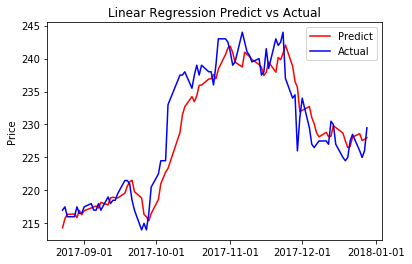

In [242]:
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit


benchmark_LR = linear_model.LinearRegression()

timeseries_cv = TimeSeriesSplit(n_splits=10)
benchmark_LR = train_clf(benchmark_LR, timeseries_cv)

validate_result(benchmark_LR, 'Linear Regression')

### Build Solution Model 
#### Model 1 : Random Forest Regressor

RMSE:  83.81106871226116
R2 score:  -76.99324152589374


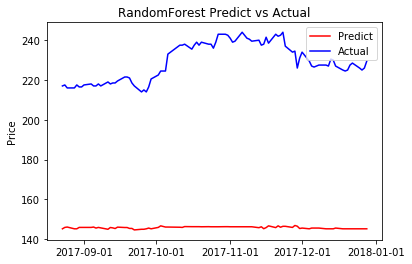

In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Save all soultion models
solution_models = {}

random_forest_clf = RandomForestRegressor(random_state=0)
random_forest_clf = train_clf(random_forest_clf,timeseries_cv)
validate_result(random_forest_clf, 'RandomForest')

random_forest_parameters = {
    'n_estimators':[10, 50, 100, 300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[None, 3, 5, 7],
}

grid_search_RF = GridSearchCV(estimator=random_forest_clf,
                           param_grid=random_forest_parameters,
                           cv=timeseries_cv,
)

grid_search_RF.fit(feature_minmax_transform, target_adj_close.values.ravel())

solution_models['Random_Forest'] = grid_search_RF

-0.9431766160951552
{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 100}
RMSE:  17.72029911425973
R2 score:  -2.4865533125528687


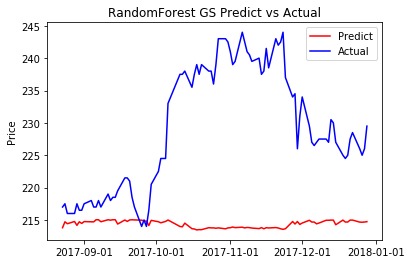

In [244]:
print(grid_search_RF.best_score_)
print(grid_search_RF.best_params_)
validate_result(grid_search_RF,'RandomForest GS')

#### Model 2 : SVM

RMSE:  4.630054603057564
R2 score:  0.7619728815542173


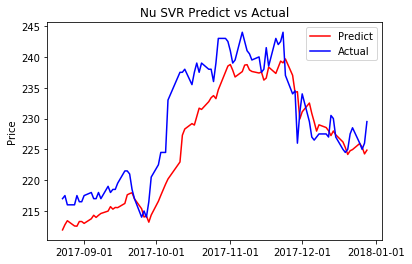

RMSE:  4.222882556126838
R2 score:  0.801996794965463


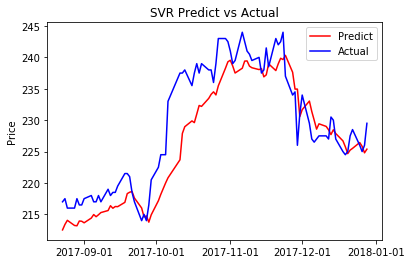

RMSE:  4.087712902070908
R2 score:  0.8144696409061479


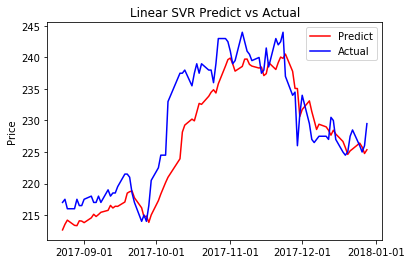

In [245]:
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR

# Compare three kinds of SVR
nu_svr_clf = NuSVR(kernel='linear')
nu_svr_clf = train_clf(nu_svr_clf,timeseries_cv)
validate_result(nu_svr_clf,'Nu SVR')

svr_clf = SVR(kernel='linear')
svr_clf = train_clf(svr_clf,timeseries_cv)
validate_result(svr_clf,'SVR')

linear_svr_clf = LinearSVR(random_state=0)
linear_svr_clf = train_clf(linear_svr_clf,timeseries_cv)
validate_result(linear_svr_clf,'Linear SVR')

0.9036537086795147
{'C': 50.0, 'epsilon': 0.1}
RMSE:  2.9618035028517533
R2 score:  0.9025982637823058


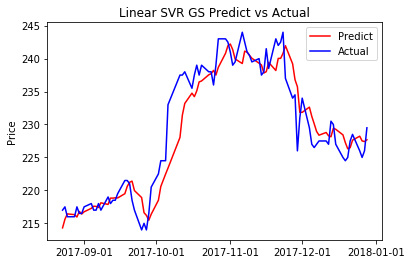

In [246]:
#Grid Search for Linear SVR

linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search = GridSearchCV(estimator=linear_svr_clf,
                           param_grid=linear_svr_parameters,
                           cv=timeseries_cv,
)

lsvr_grid_search.fit(feature_minmax_transform, target_adj_close.values.ravel())

print(lsvr_grid_search.best_score_)

# {'C': 50.0, 'epsilon': 0}
print(lsvr_grid_search.best_params_)
validate_result(lsvr_grid_search,'Linear SVR GS')

solution_models['Linear_SVR'] = lsvr_grid_search

#### Model 3 : SGD Regressor

RMSE:  4.448599411568858
R2 score:  0.7802642027961754


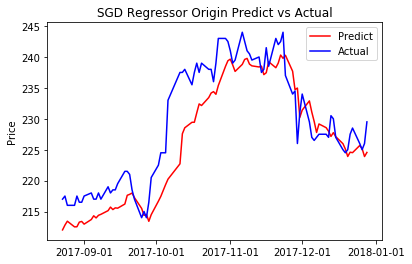


----------------------
RMSE:  3.463938498353611
R2 score:  0.8667722913207112


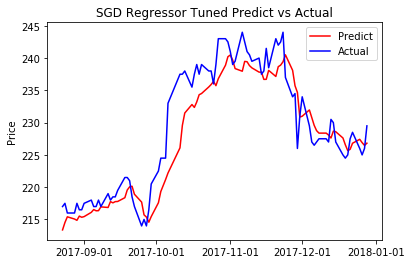

In [247]:
from sklearn.linear_model import SGDRegressor

# Default
sgdr_clf_origin = SGDRegressor(
                        tol=1e-3,
                        max_iter=1000,
                        random_state=0
)

sgdr_clf_origin = train_clf(sgdr_clf_origin,timeseries_cv)
validate_result(sgdr_clf_origin,'SGD Regressor Origin')

print('\n----------------------')

# Tuned by GridSerach below
sgdr_clf_tuned = SGDRegressor(
                        alpha=0.0001,
                        average=0,
                        learning_rate='optimal',
                        loss='epsilon_insensitive',
                        penalty='l1',
                        tol=1e-3,
                        max_iter=1000,
                        random_state=0
)

sgdr_clf_tuned = train_clf(sgdr_clf_tuned,timeseries_cv)
validate_result(sgdr_clf_tuned,'SGD Regressor Tuned')

solution_models['SGD_Regressor'] = sgdr_clf_tuned

# It takes a lot of time, so I preserve the result.
# sgdr_parameters = {
#     'loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'penalty':['none', 'l2', 'l1', 'elasticnet'],
#     'alpha':[0.0001, 0.001, 0.01, 0.5],
#     'learning_rate':['constant','optimal','invscaling'],
#     'average':[0, 1, 5, 10]
# }

# sgdr_grid_search = GridSearchCV(estimator=sgdr_clf,
#                            param_grid=sgdr_parameters,
#                            cv=timeseries_cv,
# )

# sgdr_grid_search.fit(feature_minmax_transform, target_adj_close.values.ravel())

# print(sgdr_grid_search.best_score_)

# #{'alpha': 0.0001, 'average': 0, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}
# print(sgdr_grid_search.best_params_)
# validate_result(sgdr_grid_search,'SGDR GS')

RMSE:  3.765758205688586
R2 score:  0.842544050284762


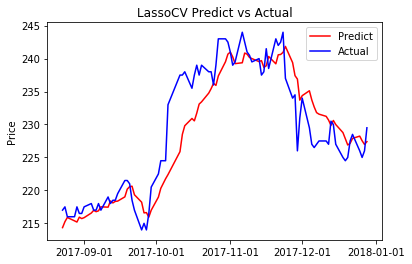

RMSE:  3.175064870106251
R2 score:  0.8880666712677514


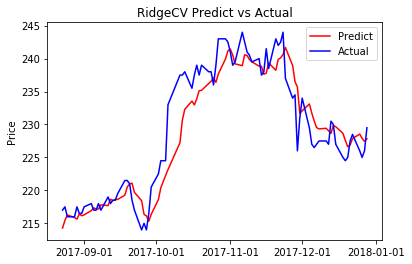

In [248]:
#### Model 4 and 5 : LassoCV, RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf = train_clf(lasso_clf,timeseries_cv)
validate_result(lasso_clf,'LassoCV')
solution_models['LassoCV'] = lasso_clf

ridge_clf = train_clf(ridge_clf,timeseries_cv)
validate_result(ridge_clf,'RidgeCV')
solution_models['RidgeCV'] = ridge_clf

### Ensemble Learner

RMSE:  3.2061092216759977
R2 score:  0.8858671032319537


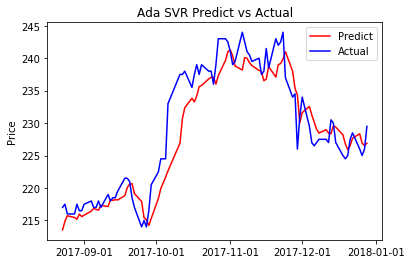

RMSE:  3.0502953223606393
R2 score:  0.8966910396499718


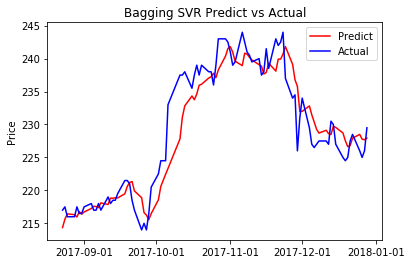

RMSE:  4.212863078220643
R2 score:  0.8029352701240744


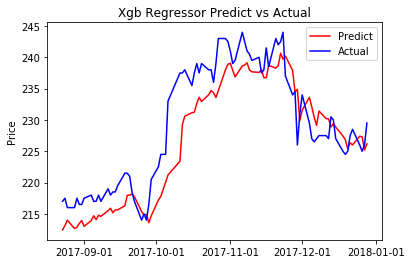

In [249]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

ada_clf = AdaBoostRegressor(LinearSVR(C=50,epsilon=0,random_state=0),
                           n_estimators=10)
ada_clf = train_clf(ada_clf,timeseries_cv)
validate_result(ada_clf,'Ada SVR')
solution_models['Ada SVR'] = ada_clf

bagging_clf = BaggingRegressor(LinearSVR(C=50,epsilon=0,random_state=0),
                           n_estimators=10)
bagging_clf = train_clf(bagging_clf,timeseries_cv)
validate_result(bagging_clf,'Bagging SVR')
solution_models['Bagging SVR'] = bagging_clf

xgb_clf = xgb.XGBRegressor(booster='gblinear',
                          colsample_bylevel=0.3,
                           colsample_bytree=0.3,
                           gamma=0,
                           learning_rate=0.7,
                           max_depth=3,
                           n_estimators=200,
                           reg_alpha=0,
                           reg_lambda=0.1
                          )
xgb_clf = train_clf(xgb_clf,timeseries_cv)
validate_result(xgb_clf,'Xgb Regressor')
solution_models['Xgb Regressor'] = xgb_clf

RMSE:  4.2308379336035555
R2 score:  0.801250066186511


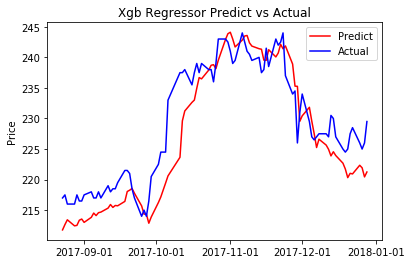

In [250]:
xgb_test = xgb.XGBRegressor(booster='gblinear'
                          )
xgb_test = train_clf(xgb_test,timeseries_cv)
validate_result(xgb_test,'Xgb Regressor')

In [251]:
# It take lot's of time
# xgb_params = {
#     'colsample_bytree':[0.3,0.5,0.7,1],
#     'colsample_bylevel':[0.3,0.5,0.7,1],
#     'gamma':[0,0.3,0.5,1],
#     'max_depth': [3,6,9],
#     'n_estimators':[50,100,150,200],
#     'reg_lambda': [0.1,0.3,0.5],
#     'learning_rate':[0.1,0.3,0.5],
#     'reg_alpha':[0,0.1,0.5],
# }

# {'colsample_bylevel': 0.3, 'colsample_bytree': 0.3, 'gamma': 0,
# 'learning_rate':  0.5, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.1}
# grid_search_XGB = GridSearchCV(estimator=xgb_clf,
#                            param_grid=xgb_params,
#                            cv=timeseries_cv,
# ).fit(feature_minmax_transform, target_adj_close.values.ravel())

# validate_result(grid_search_XGB,'XGB GS')
# print(grid_search_XGB.best_params_)

### Solution Models Review

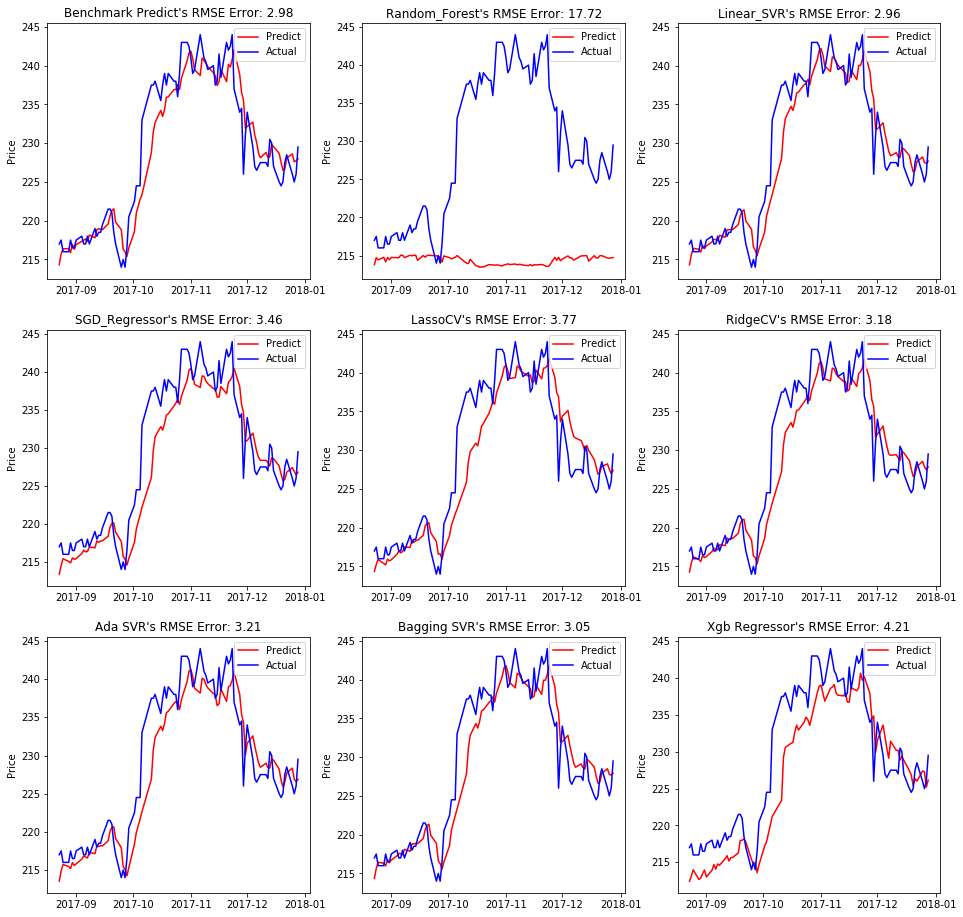

In [255]:
RMSE_scores = {}

def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_LR.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)
    
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

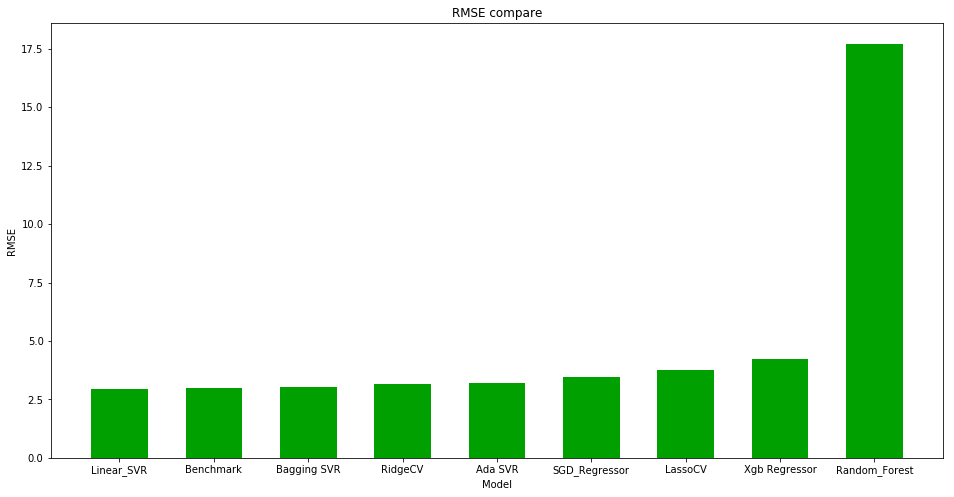

In [256]:
# Compare RMSE
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:9]]
values = model_values[indices][:9]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(9), values ,width = 0.6, align="center", color = '#00A000')
plt.xticks(np.arange(9), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

### Feature Selection

In [280]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(ridge_clf)
sfm.fit(feature_minmax_transform, target_adj_close.values.ravel())
display(feature_minmax_transform.head())
sup = sfm.get_support()
zipped = zip(feature_minmax_transform,sup)
print(*zipped)

,Open,High,Low,Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI
Date,,,,,,,,,,
2003-02-17,0.009425,0.006889,0.006600,0.228361,0.004134,0.011676,0.000315,0.370837,0.341248,0.463083
2003-02-18,0.009425,0.006889,0.006600,0.126115,0.003479,0.010644,0.000065,0.374641,0.339757,0.432853
2003-02-19,0.009790,0.007254,0.007334,0.204630,0.002838,0.009459,0.000000,0.378674,0.339651,0.437254
2003-02-20,0.006526,0.008342,0.006600,0.210167,0.002347,0.008239,0.000274,0.386193,0.341442,0.484113
2003-02-21,0.013776,0.014505,0.013564,0.275315,0.001965,0.007072,0.000715,0.395362,0.345079,0.515577


('Open', False) ('High', False) ('Low', False) ('Volume', False) ('SMA', True) ('Upper_band', True) ('Lower_band', True) ('DIF', True) ('MACD', False) ('RSI', False)


In [281]:
# Drop unselected features

feature_selected = feature_minmax_transform[['SMA','Upper_band','Lower_band','DIF']]
feature_selected_validation_X = validation_X[['SMA','Upper_band','Lower_band','DIF']]
display(feature_selected.head())
display(feature_selected_validation_X.head())

,SMA,Upper_band,Lower_band,DIF
Date,,,,
2003-02-17,0.004134,0.011676,0.000315,0.370837
2003-02-18,0.003479,0.010644,0.000065,0.374641
2003-02-19,0.002838,0.009459,0.000000,0.378674
2003-02-20,0.002347,0.008239,0.000274,0.386193
2003-02-21,0.001965,0.007072,0.000715,0.395362


,SMA,Upper_band,Lower_band,DIF
Date,,,,
2017-08-23,0.877585,0.862886,0.879145,0.495516
2017-08-24,0.878637,0.865542,0.878513,0.516990
2017-08-25,0.879991,0.868384,0.878296,0.536814
2017-08-28,0.879991,0.868384,0.878296,0.539485
2017-08-29,0.879540,0.866781,0.879048,0.540412


In [282]:
def feature_selected_train_clf(model, ts_split):
    clf = model
    for train_index, test_index in ts_split.split(feature_selected):
        X_train, X_test = feature_selected[:len(train_index)], feature_selected[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        clf.fit(X_train, y_train)
    return clf

def feature_selected_validate_result(model, model_name):
    predicted = model.predict(feature_selected_validation_X)
    
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)
    print('----------------------')


print('---------Benchmark-------------')  
benchmark_LR_fs = linear_model.LinearRegression()
benchmark_LR_fs = feature_selected_train_clf(benchmark_LR_fs, timeseries_cv)
feature_selected_validate_result(benchmark_LR_fs, 'Linear Regression')

feature_selected_solution_models = {}
 
print('--------Solution Models--------------')  
# Random Forest
random_forest_clf_fs = RandomForestRegressor(random_state=0,
                                             max_depth=7,
                                             max_features='auto',
                                             n_estimators=100
)
random_forest_parameters = {
    'n_estimators':[10, 50, 100, 300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[None, 3, 5, 7],
}
grid_search_RF_fs = GridSearchCV(estimator=random_forest_clf_fs,
                           param_grid=random_forest_parameters,
                           cv=timeseries_cv,
)
grid_search_RF_fs.fit(feature_selected, target_adj_close.values.ravel())
feature_selected_validate_result(grid_search_RF_fs,'Feature selected RandomForest GS')
feature_selected_solution_models['FS_RandomForest'] = grid_search_RF_fs

# Linear SVR
linear_svr_clf_fs = LinearSVR(random_state=0,
                          C=50.0,
                          epsilon=0)
linear_svr_clf_fs = feature_selected_train_clf(linear_svr_clf_fs,timeseries_cv)
feature_selected_validate_result(linear_svr_clf_fs,'Feature selected LSVR')
feature_selected_solution_models['FS_LSVR'] = linear_svr_clf_fs

# SGDR
sgdr_clf_tuned_fs = SGDRegressor(
                        alpha=0.0001,
                        average=0,
                        learning_rate='optimal',
                        loss='epsilon_insensitive',
                        penalty='l1',
                        tol=1e-3,
                        max_iter=1000,
                        random_state=0
)
sgdr_clf_tuned_fs = feature_selected_train_clf(sgdr_clf_tuned_fs,timeseries_cv)
feature_selected_validate_result(sgdr_clf_tuned_fs,'Feature selected SGDR')
feature_selected_solution_models['FS_SGDR'] = sgdr_clf_tuned_fs

# lasso
lasso_clf_fs = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_fs = feature_selected_train_clf(lasso_clf_fs,timeseries_cv)
feature_selected_validate_result(lasso_clf_fs,'Feature selected LassoCV')
feature_selected_solution_models['FS_Lasso'] = lasso_clf_fs

# Ridge
ridge_clf_fs = RidgeCV(gcv_mode='auto')
ridge_clf_fs = feature_selected_train_clf(ridge_clf_fs,timeseries_cv)
feature_selected_validate_result(ridge_clf_fs,'Feature selected RidgeCV')
feature_selected_solution_models['FS_RidgeCV'] = ridge_clf_fs

# Ada
ada_clf_fs = AdaBoostRegressor(LinearSVR(C=50,epsilon=0,random_state=0),
                           n_estimators=10)
ada_clf_fs = feature_selected_train_clf(ada_clf_fs,timeseries_cv)
feature_selected_validate_result(ada_clf_fs,'Ada SVR')
feature_selected_solution_models['FS_Ada'] = lasso_clf_fs

# Bagging
bagging_clf_fs = BaggingRegressor(LinearSVR(C=50,epsilon=0,random_state=0),
                           n_estimators=10)
bagging_clf_fs = feature_selected_train_clf(bagging_clf_fs,timeseries_cv)
feature_selected_validate_result(bagging_clf_fs,'Bagging SVR')
feature_selected_solution_models['FS_Bagging'] = bagging_clf_fs

# XGB
xgb_clf_fs = xgb.XGBRegressor(booster='gblinear',
                          colsample_bylevel=0.3,
                           colsample_bytree=0.3,
                           gamma=0,
                           learning_rate=0.7,
                           max_depth=3,
                           n_estimators=200,
                           reg_alpha=0,
                           reg_lambda=0.1
                          )
xgb_clf_fs = feature_selected_train_clf(xgb_clf_fs,timeseries_cv)
feature_selected_validate_result(xgb_clf_fs,'Xgb Regressor')
feature_selected_solution_models['FS_XGB'] = xgb_clf_fs


---------Benchmark-------------
Linear Regression

RMSE:  4.620517248123333
R2 score:  0.7629524859822908
----------------------
--------Solution Models--------------
Feature selected RandomForest GS

RMSE:  17.897042080285992
R2 score:  -2.5564502019736275
----------------------
Feature selected LSVR

RMSE:  4.6265458096772045
R2 score:  0.7623335129436726
----------------------
Feature selected SGDR

RMSE:  4.696212744548348
R2 score:  0.7551220171642303
----------------------
Feature selected LassoCV

RMSE:  4.709217542263544
R2 score:  0.7537639023589786
----------------------
Feature selected RidgeCV

RMSE:  4.6519702288354425
R2 score:  0.7597142217895696
----------------------
Ada SVR

RMSE:  4.763379845039405
R2 score:  0.7480672408721215
----------------------
Bagging SVR

RMSE:  4.6262829887499395
R2 score:  0.7623605144929424
----------------------
Xgb Regressor

RMSE:  4.638464506246428
R2 score:  0.7611074044971566
----------------------


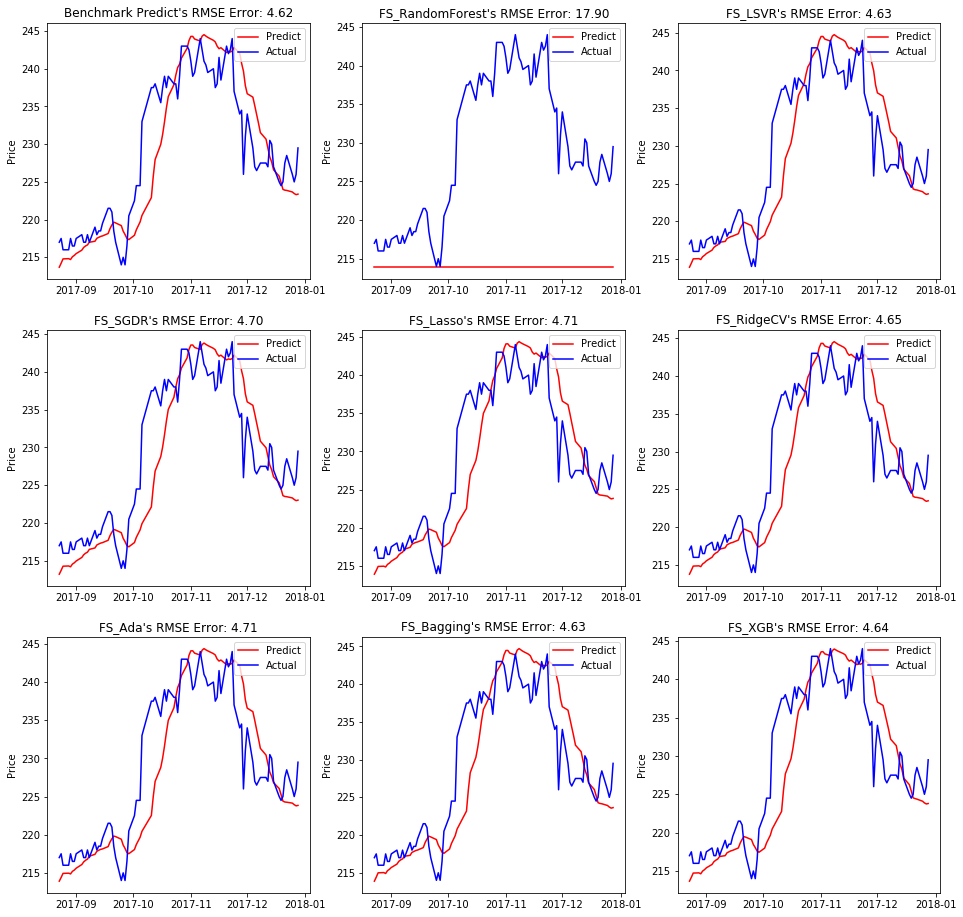

In [283]:
FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_fs_predicted = benchmark_LR_fs.predict(feature_selected_validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_fs_predicted))
    FS_RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_fs_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)
    
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

fs_model_review(feature_selected_solution_models)

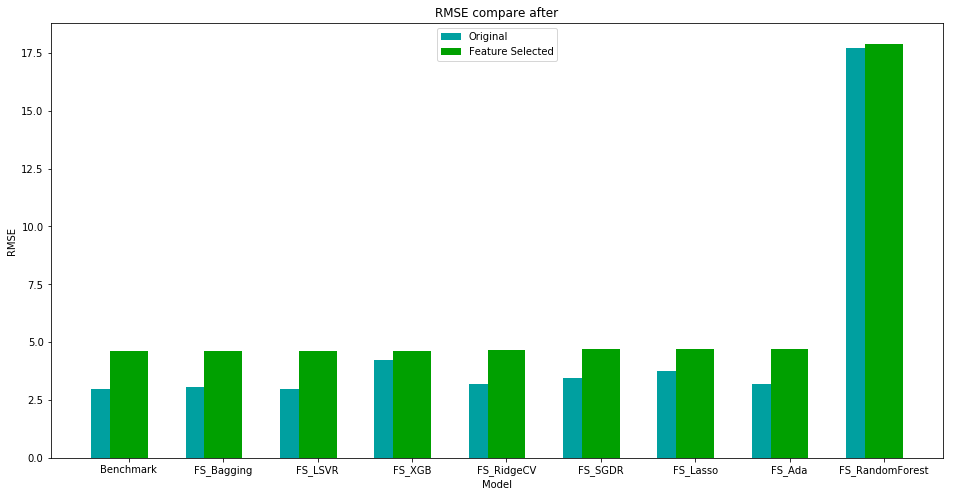

In [284]:
# Compare RMSE after selected features
fs_model_names = []
fs_model_values = []
for name, value in FS_RMSE_scores.items():
    fs_model_names.append(name)
    fs_model_values.append(value)

fs_model_values = np.array(fs_model_values)
fs_model_names = np.array(fs_model_names)

fs_indices = np.argsort(fs_model_values)
fs_columns = fs_model_names[fs_indices[:9]]
fs_values = fs_model_values[fs_indices][:9]
origin_values = model_values[fs_indices][:9]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(9) - 0.2 , origin_values ,width = 0.4, align="center", color = '#00A0A0', label = "Original")
plt.bar(np.arange(9), fs_values ,width = 0.4, align="center", color = '#00A000', label = "Feature Selected")
plt.xticks(np.arange(9), fs_columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare after')
plt.legend(loc = 'upper center')
plt.show()

In [297]:
import time

# Choose the top three model to ensemble them
ensemble_solution_models = [lsvr_grid_search, bagging_clf, ridge_clf]
class EnsembleSolution:
    models = []
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for i in self.models:
            i.fit(X, y)
    def predict(self, X):
        start = time.time()
        result = 0
        for i in self.models:
            result = result + i.predict(X)
        
        result = result / len(self.models)
        end = time.time()
        print('Running Time: {}'.format(end - start))
        return result

Compare on original features 

Benchmark Model
RMSE:  2.9823229399228497 
R2 score:  0.9012439861833962 

LinearSVR Model
RMSE:  2.9618035028517533 
R2 score:  0.9025982637823058 

Ensemble Solution Model
Running Time: 0.0010018348693847656
RMSE:  3.0543951470010837
R2 score:  0.8964131431075624


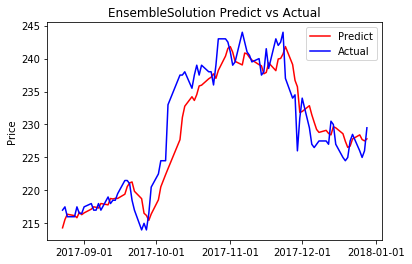

In [336]:
print("Compare on original features \n")
print("Benchmark Model")
print("RMSE:  2.9823229399228497 \nR2 score:  0.9012439861833962 \n")
print("LinearSVR Model")
print("RMSE:  2.9618035028517533 \nR2 score:  0.9025982637823058 \n")
print("Ensemble Solution Model")
EnsembleModel = EnsembleSolution(ensemble_solution_models)
validate_result(EnsembleModel,'EnsembleSolution')

In [294]:
#Compare running time between Feature selected and Original
ensemble_solution_models_fs = [linear_svr_clf_fs, bagging_clf_fs, ridge_clf_fs]
EnsembleModel_fs = EnsembleSolution(ensemble_solution_models_fs)
feature_selected_validate_result(EnsembleModel_fs,'FeatureSelected')
print('Original one')
print('Running Time: 0.0015022754669189453')

Running Time: 0.0010027885437011719
FeatureSelected

RMSE:  4.6317560080437445
R2 score:  0.7617979138832323
----------------------
Original one
Running Time: 0.0015022754669189453


In [329]:
def cross_validate(model, ts_split):
    clf = model
    total_rmse = 0
    total_r2 = 0
    count = 0
    for train_index, test_index in ts_split.split(validation_X):
        X_test1, X_test2 = validation_X[:len(train_index)], validation_X[len(train_index): (len(train_index)+len(test_index))]
        y_test1, y_test2 = validation_y[:len(train_index)].values.ravel(), validation_y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        predicted_test1 = clf.predict(X_test1)
        temp1_RMSE, temp1_R2 = print_result(y_test1, predicted_test1, train_index)

        predicted_test2 = clf.predict(X_test2)
        temp2_RMSE, temp2_R2 = print_result(y_test2, predicted_test2, test_index)
        
        total_rmse += temp1_RMSE + temp2_RMSE
        total_r2 += temp1_R2 + temp2_R2
        count += 2
    return total_rmse / count, total_r2 / count

def print_result(actual, predict, index):
    RMSE_score = np.sqrt(mean_squared_error(actual, predict))
    print('From {} to {}'.format(index[0],index[-1]))
    print('RMSE: ', RMSE_score)
    R2_score = r2_score(actual, predict)
    print('R2 score: ', R2_score)
    print('---------------------')
    return RMSE_score, R2_score

def train_clf_multipletimes(model, times):
    total_rmse = 0
    total_r2 = 0
    for i in range(times):
        clf = model
        for train_index, test_index in TimeSeriesSplit(n_splits=i+2).split(feature_minmax_transform):
            X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
            y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
            clf.fit(X_train, y_train)
        predicted = clf.predict(validation_X)
        rmse, r2 = print_result(validation_y, predicted, [0,len(validation_y)])
        total_rmse += rmse
        total_r2 += r2
    return total_rmse / times, total_r2 / times

Running Time: 0.0010030269622802734
RMSE:  3.082485494644283
R2 score:  0.8944990678727585


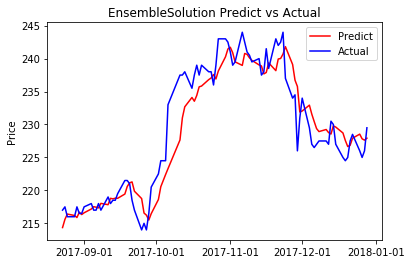

In [317]:
#Test solution model with multi randomstate
solution_lsvr = LinearSVR(random_state=None)
solution_lsvr_gs = GridSearchCV(estimator=solution_lsvr,
                           param_grid=linear_svr_parameters,
                           cv=timeseries_cv,
)

solution_ridge_clf = RidgeCV(gcv_mode='auto')

solution_bagging_clf = BaggingRegressor(LinearSVR(C=50,epsilon=0,random_state=None),
                           n_estimators=10)

test_ensemble_models = [solution_lsvr_gs, solution_ridge_clf, solution_bagging_clf]
TestEnsembleModel = EnsembleSolution(test_ensemble_models)
TestEnsembleModel = train_clf(TestEnsembleModel,timeseries_cv)
validate_result(TestEnsembleModel,'EnsembleSolution')

In [339]:
print('Benchmark')
t_multiple_benchmark_RMSE,t_multiple_benchmark_R2 = train_clf_multipletimes(linear_model.LinearRegression(), 5)
print('RMSE: {} //  R2: {}\n'.format(t_multiple_benchmark_RMSE, t_multiple_benchmark_R2))

print('Ensemble')
t_multiple_ensemble_RMSE,t_multiple_ensemble_R2 = train_clf_multipletimes(EnsembleSolution(test_ensemble_models), 5)
print(' RMSE: {} //  R2: {}\n'.format(t_multiple_ensemble_RMSE, t_multiple_ensemble_R2))

print('LSVR')
t_multiple_LSVR_RMSE,t_multiple_LSVR_R2 = train_clf_multipletimes(solution_lsvr_gs, 5)
print(' RMSE: {} //  R2: {}'.format(t_multiple_LSVR_RMSE, t_multiple_LSVR_R2))

Benchmark
From 0 to 89
RMSE:  3.657330216994294
R2 score:  0.8514808134589575
---------------------
From 0 to 89
RMSE:  3.2731844710055267
R2 score:  0.8810415826171221
---------------------
From 0 to 89
RMSE:  3.2021689312121806
R2 score:  0.8861474682376115
---------------------
From 0 to 89
RMSE:  3.1036927101721776
R2 score:  0.8930424008439833
---------------------
From 0 to 89
RMSE:  3.08844912157712
R2 score:  0.8940904516302282
---------------------
RMSE: 3.26496509019226 //  R2: 0.8811605433575804

Ensemble
Running Time: 0.0005025863647460938
From 0 to 89
RMSE:  3.910386911496333
R2 score:  0.8302172065652855
---------------------
Running Time: 0.0005023479461669922
From 0 to 89
RMSE:  3.4002367441360466
R2 score:  0.8716273442418354
---------------------
Running Time: 0.0005004405975341797
From 0 to 89
RMSE:  3.314516025217622
R2 score:  0.8780183623086415
---------------------
Running Time: 0.0010018348693847656
From 0 to 89
RMSE:  3.2370455875342454
R2 score:  0.88365389602

In [340]:
test_ensemble_RMSE, test_ensemble_R2 = cross_validate(TestEnsembleModel,timeseries_cv)

Running Time: 0.0010027885437011719
From 0 to 8
RMSE:  1.3372365031637081
R2 score:  -2.811692597286149
---------------------
Running Time: 0.0005013942718505859
From 9 to 16
RMSE:  0.6924496464585796
R2 score:  0.12322466216116668
---------------------
Running Time: 0.0010025501251220703
From 0 to 16
RMSE:  1.0827444783453923
R2 score:  -0.624963980608964
---------------------
Running Time: 0.0005016326904296875
From 17 to 24
RMSE:  2.370633856081979
R2 score:  0.25067934938638503
---------------------
Running Time: 0.0005013942718505859
From 0 to 24
RMSE:  1.611073484710158
R2 score:  0.17924431661518725
---------------------
Running Time: 0.0005013942718505859
From 25 to 32
RMSE:  5.680971944582183
R2 score:  0.40561142358321967
---------------------
Running Time: 0.0005016326904296875
From 0 to 32
RMSE:  3.1289289590192295
R2 score:  0.5751873166947605
---------------------
Running Time: 0.0005013942718505859
From 33 to 40
RMSE:  4.449769784841505
R2 score:  -17.635718718200863
---

In [341]:
test_lsvr_RMSE, test_lsvr_R2 = cross_validate(lsvr_grid_search,timeseries_cv)

From 0 to 8
RMSE:  1.2754073167001925
R2 score:  -2.4673623606021895
---------------------
From 9 to 16
RMSE:  0.7493311005927754
R2 score:  -0.026737551205632037
---------------------
From 0 to 16
RMSE:  1.060852908747211
R2 score:  -0.5599192823273564
---------------------
From 17 to 24
RMSE:  2.480641512513926
R2 score:  0.17952235818568285
---------------------
From 0 to 24
RMSE:  1.6536095029578795
R2 score:  0.13533253596236883
---------------------
From 25 to 32
RMSE:  5.481943102021632
R2 score:  0.44652983852565087
---------------------
From 0 to 32
RMSE:  3.058887751401448
R2 score:  0.5939933471646501
---------------------
From 33 to 40
RMSE:  3.420327647073869
R2 score:  -10.010485847847407
---------------------
From 0 to 40
RMSE:  3.132688943959846
R2 score:  0.8642387134572026
---------------------
From 41 to 48
RMSE:  2.1833469819789486
R2 score:  0.18805519947342308
---------------------
From 0 to 48
RMSE:  2.998296704061345
R2 score:  0.9121373545120831
---------------

In [342]:
test_benchmark_RMSE, test_benchmark_R2 = cross_validate(benchmark_LR,timeseries_cv)

From 0 to 8
RMSE:  1.2615846251147615
R2 score:  -2.3926120282211114
---------------------
From 9 to 16
RMSE:  0.789823000738961
R2 score:  -0.140700109707514
---------------------
From 0 to 16
RMSE:  1.065913716762565
R2 score:  -0.5748379995557182
---------------------
From 17 to 24
RMSE:  2.434433675495672
R2 score:  0.20980435728168445
---------------------
From 0 to 24
RMSE:  1.6337278040114627
R2 score:  0.15599970351628012
---------------------
From 25 to 32
RMSE:  5.257794939820304
R2 score:  0.490865586109698
---------------------
From 0 to 32
RMSE:  2.953590134229573
R2 score:  0.6214645771355584
---------------------
From 33 to 40
RMSE:  3.83642353163367
R2 score:  -12.852372248538881
---------------------
From 0 to 40
RMSE:  3.145368599075989
R2 score:  0.8631374933585141
---------------------
From 41 to 48
RMSE:  2.2373620893895994
R2 score:  0.14738388923907186
---------------------
From 0 to 48
RMSE:  3.0158540318791536
R2 score:  0.911105335287028
---------------------


In [344]:
print('Benchmark RMSE: {} // Benchmark R2: {}'.format(test_benchmark_RMSE, test_benchmark_R2))
print('Ensemble RMSE: {} // Ensemble R2: {}'.format(test_ensemble_RMSE, test_ensemble_R2))
print('LSVR RMSE: {} // LSVR R2: {}'.format(test_lsvr_RMSE, test_lsvr_R2))

Benchmark RMSE: 2.6744083445881563 // Benchmark R2: -0.5749556227753002
Ensemble RMSE: 2.867739863316714 // Ensemble R2: -0.903554789628217
LSVR RMSE: 2.6487740234952946 // LSVR R2: -0.4150489257089208
